## 포도DAY 활성화 위한 데이터 분석

### 파일 출처
- 1번 분석 : 네이버 데이터랩
- 2번 분석 : 네이버 데이터랩
- 2-1번 분석 : 네이버 데이터랩
- 2-2번 분석 : 구글 트렌드
- 2-3번 분석 : 공공데이터포털

In [1]:
# 모듈 로딩
import pandas as pd

# 경로 지정
DIR_PATH = './Data_hj/'
FILE_NAME = DIR_PATH + 'grape_shoppingInsight.csv'

## 1. 포도DAY는 적절한 날짜로 지정 되었는가? 
- 네이버에서 '포도' 키워드 쇼핑 검색량을 가져와 제일 많이 언급하는 날짜랑 비교하기 

In [2]:
# 파일 읽어오기
df= pd.read_csv(FILE_NAME, header=7)

In [3]:
df.head(10)

,날짜,포도
0,2021-01-01,5
1,2021-01-02,5
2,2021-01-03,6
3,2021-01-04,9
4,2021-01-05,7
5,2021-01-06,6
6,2021-01-07,6
7,2021-01-08,4
8,2021-01-09,5
9,2021-01-10,6


In [4]:
# 날짜 컬럼을 인덱스로 설정
df.set_index('날짜', inplace=True)

In [5]:
df

,포도
날짜,
2021-01-01,5
2021-01-02,5
2021-01-03,6
2021-01-04,9
2021-01-05,7
...,...
2021-12-27,8
2021-12-28,8
2021-12-29,8


In [6]:
# 기존 컬럼 이름을 원하는 이름으로 바꾸기 
df=df.rename(columns={'포도':'포도 검색량'})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2021-01-01 to 2021-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   포도 검색량  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7+ KB


In [8]:
# 인덱스 타입을 object에서 datetime으로 바꿔주기
df.index = pd.to_datetime(df.index)

<AxesSubplot:xlabel='날짜'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\l

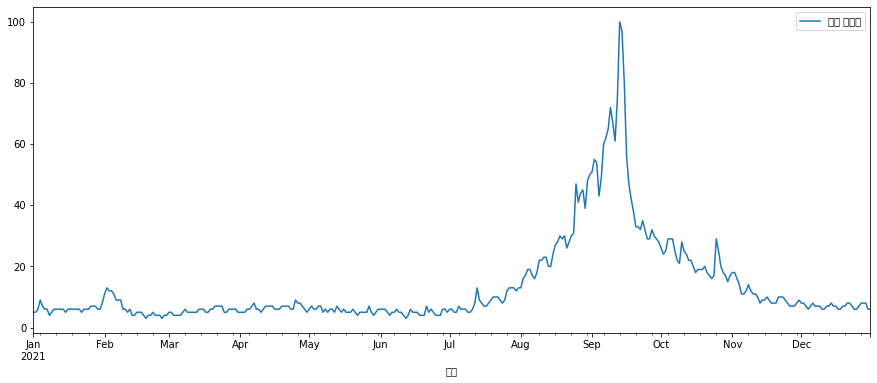

In [9]:
# 그래프 출력
df.plot(kind='line',figsize=(15, 6))    

### 1번 분석결과 

- 현재 포도DAY로 지정된 날짜(8/8)와 실제 '포도' 키워드 검색량이 많은 날짜(8월~9월)가 비슷함.
- 포도DAY의 날짜 선정은 적절하게 되었음.

## 2. 포도DAY를 홍보하는 방법이 뭐가 있을까?

- 지역 축제를 이용해서 '8월 8일에 포도를 먹어야 겠다'는 인식 심기

### 2-1. 다른 유명 축제들과 포도 축제 검색량 비교 (3년치, 2019~2021)

In [10]:
# 경로 지정
DIR_PATH = './Data_hj/'
FILE_NAME = DIR_PATH + 'datalab_festival.xlsx'

# 파일 읽어오기
feDF= pd.read_excel(FILE_NAME, header=6)

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [11]:
feDF.head(10)

,날짜,영동 포도 축제,날짜.1,진해 군항제,날짜.2,보령 머드 축제
0,2019-01-01,0.0,2019-01-01,1.10054,2019-01-01,0.23976
1,2019-01-02,0.0,2019-01-02,0.95511,2019-01-02,0.39698
2,2019-01-03,0.0,2019-01-03,1.19094,2019-01-03,0.39305
3,2019-01-04,0.0,2019-01-04,0.99441,2019-01-04,0.30657
4,2019-01-05,0.0,2019-01-05,0.99048,2019-01-05,0.24369
5,2019-01-06,0.0,2019-01-06,1.34030,2019-01-06,0.35767
6,2019-01-07,0.0,2019-01-07,1.42284,2019-01-07,0.48738
7,2019-01-08,0.0,2019-01-08,1.54468,2019-01-08,0.72321
8,2019-01-09,0.0,2019-01-09,1.40319,2019-01-09,0.38125
9,2019-01-10,0.0,2019-01-10,1.32851,2019-01-10,0.33802


In [12]:
# 내용이 중복인 컬럼 제거 
feDF.drop(['날짜.1','날짜.2'], axis=1, inplace=True)

In [13]:
feDF

,날짜,영동 포도 축제,진해 군항제,보령 머드 축제
0,2019-01-01,0.0,1.10054,0.23976
1,2019-01-02,0.0,0.95511,0.39698
2,2019-01-03,0.0,1.19094,0.39305
3,2019-01-04,0.0,0.99441,0.30657
4,2019-01-05,0.0,0.99048,0.24369
...,...,...,...,...
1091,2021-12-27,0.0,0.45986,0.46380
1092,2021-12-28,0.0,0.31051,0.40091
1093,2021-12-29,0.0,0.31051,0.42056
1094,2021-12-30,0.0,0.31837,0.33016


In [14]:
# 날짜 컬럼을 인덱스로 설정
feDF.set_index('날짜', inplace=True)

In [15]:
# 인덱스 타입을 object에서 datetime으로 바꿔주기
feDF.index = pd.to_datetime(feDF.index)

<AxesSubplot:xlabel='날짜'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda

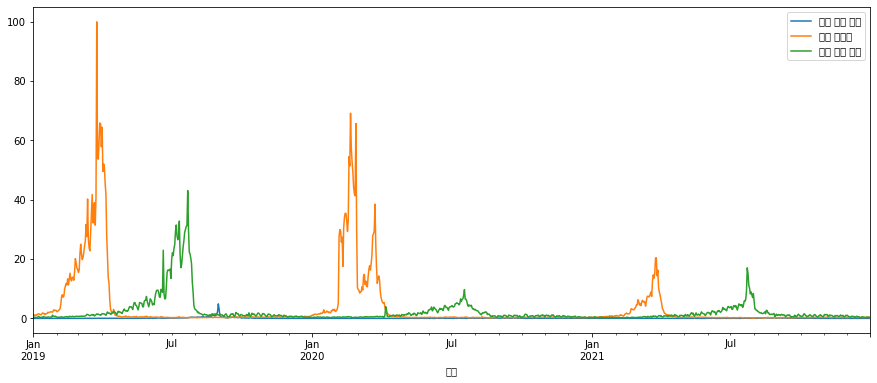

In [16]:
feDF.plot(kind='line',figsize=(15, 6))

### 2-1번 분석 결과

- 다른 축제에 비해 포도 축제에 검색량이 현저하게 적다.
- 많은 홍보가 필요하다.

## 2-2. 홍보를 하는 방법이 뭐가 있을까?
- 1. 포도 축제의 규모와 수를 키움. 
- 2. 포도와 함께 등장하는 연관 키워드 알아보기 => 그것을 통해 포도 축제에 한 테마로 작용하기

In [17]:
# '포도' 키워드를 많이 입력하는 지역 알아보고 포도 축제 증설 

# 경로 지정
DIR_PATH = './Data_hj/'
FILE_NAME = DIR_PATH + 'grape_geo.csv'

FILE_NAME

'./Data/grape_geo.csv'

In [18]:
# 파일 읽어오기
geoDF = pd.read_csv(FILE_NAME, encoding='utf-8', header=1)

In [19]:
geoDF = geoDF.head(10)
geoDF

,도시,포도: (21. 7. 11.~22. 7. 11.)
0,영동군,100.0
1,김천시,61.0
2,해남군,61.0
3,여주군,49.0
4,제천시,48.0
5,동해시,45.0
6,남원시,44.0
7,상주시,42.0
8,서귀포시,42.0
9,영천시,41.0


In [20]:
# 기존 컬럼 이름을 원하는 이름으로 바꾸기 
geoDF = geoDF.rename(columns={'포도: (21. 7. 11.~22. 7. 11.)':'검색량'})

#### 검색량이 높은 도시 TOP 10

In [21]:
geoDF

,도시,검색량
0,영동군,100.0
1,김천시,61.0
2,해남군,61.0
3,여주군,49.0
4,제천시,48.0
5,동해시,45.0
6,남원시,44.0
7,상주시,42.0
8,서귀포시,42.0
9,영천시,41.0


In [22]:
# 전국 포도 축제 조회

# 경로 지정
DIR_PATH = './Data_hj/'
FILE_NAME = DIR_PATH + '전국문화축제표준데이터.csv'
culDF=pd.read_csv(FILE_NAME, encoding='cp949')

In [23]:
culDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   축제명       1013 non-null   object 
 1   개최장소      1013 non-null   object 
 2   축제시작일자    1013 non-null   object 
 3   축제종료일자    1013 non-null   object 
 4   축제내용      1013 non-null   object 
 5   주관기관      1013 non-null   object 
 6   주최기관      1013 non-null   object 
 7   후원기관      482 non-null    object 
 8   전화번호      945 non-null    object 
 9   홈페이지주소    639 non-null    object 
 10  관련정보      324 non-null    object 
 11  소재지도로명주소  929 non-null    object 
 12  소재지지번주소   779 non-null    object 
 13  위도        879 non-null    float64
 14  경도        877 non-null    float64
 15  데이터기준일자   1013 non-null   object 
 16  제공기관코드    1013 non-null   int64  
 17  제공기관명     1013 non-null   object 
dtypes: float64(2), int64(1), object(15)
memory usage: 142.6+ KB


In [24]:
culDF_new=culDF.iloc[:,[0,2,3,4,11,13,14]]
culDF_new

,축제명,축제시작일자,축제종료일자,축제내용,소재지도로명주소,위도,경도
0,[SEMI 예천곤충엑스포] 2022예천곤충축제,2022-08-06,2022-08-15,"살아있는 곤충세상 속으로, 전시체험, 공식행사, 학술행사, 연계행사",경상북도 예천군 효자면 은풍로 1045,36.824436,128.458646
1,황룡강 노란꽃잔치,2022-10-01,2022-10-10,공연+체험+판매행사 등,NaN,35.309510,126.781506
2,황룡강 (洪)길동무 꽃길 축제,2022-05-20,2022-05-22,공연+체험+판매행사 등,NaN,35.309510,126.781506
3,백양단풍축제,2022-11-05,2022-11-07,공연+체험+판매행사 등,전라남도 장성군 북하면 백양로 1239,35.439726,126.882860
4,축령산 편백산소축제,2022-10-01,2022-10-01,공연+체험+판매행사 등,NaN,35.373890,126.756487
...,...,...,...,...,...,...,...
1008,제8회 세계인의 날 기념행사,2015-05-17,2015-05-17,"기념식, 문화 및 각종 부대행사",경기도 안산시 단원구 부부로 43,37.332436,126.790343
1009,안산M밸리록페스티벌,2015-07-24,2015-07-26,록페스티벌,경기도 안산시 단원구 대부황금로 1490(대부북동),37.287067,126.575056
1010,여르미오페스티벌,2015-08-08,2015-08-08,대중예술축제,경기도 안산시 단원구 광덕대로 157,37.310742,126.829822
1011,안산 대부포도축제,2015-09-12,2015-09-13,"대부포도 홍보,전시,직거래,체험행사",경기도 안산시 단원구 대부황금로 1490(대부북동),37.287067,126.575056


In [25]:
# 포도 키워드가 들어간 축제만 보여주기 

bool_li=[]
for id in range(len(culDF_new['축제명'])):
    if '포도' in culDF_new.loc[id,'축제명']:
        bool_li.append(True)
    else:
        bool_li.append(False)

culDF_new[bool_li]

,축제명,축제시작일자,축제종료일자,축제내용,소재지도로명주소,위도,경도
235,대부포도축제,2019-09-07,2019-09-08,"대부포도 홍보 및 직거래, 문화공연 등",NaN,37.286274,126.574554
308,향수옥천포도복숭아축제,2021-07-24,2021-07-26,우체국 쇼핑몰 기획전(온라인),충청북도 옥천군 옥천읍 관성로 53,36.303071,127.575808
387,입장거봉포도축제,2021-09-06,2021-09-20,"입장거봉포도 휴게소 내 드라이브스루 시식코너, 판매장 운영",충청남도 천안시 서북구 입장면 하장4길 19,36.913630,127.219759
426,고서포도축제,2023-08-19,2023-08-21,특산품 홍보 및 판매,전라남도 담양군 고서면 가사문학로 325,35.223701,126.972939
561,2021 영동포도축제,2021-08-17,2021-09-15,영동포도축제를 온라인으로 추진,충청북도 영동군 영동읍 동정로 1,NaN,NaN
928,(취소) 2020 화성송산포도축제,2021-09-04,2021-09-05,포도 체험 + 직거래 장터,경기도 화성시 서신면 궁평항로 1049-24,37.116029,126.681275
1011,안산 대부포도축제,2015-09-12,2015-09-13,"대부포도 홍보,전시,직거래,체험행사",경기도 안산시 단원구 대부황금로 1490(대부북동),37.287067,126.575056


In [26]:
culDF_new=culDF_new[bool_li]
rnDF = culDF_new.reset_index(drop=True)
rnDF

,축제명,축제시작일자,축제종료일자,축제내용,소재지도로명주소,위도,경도
0,대부포도축제,2019-09-07,2019-09-08,"대부포도 홍보 및 직거래, 문화공연 등",NaN,37.286274,126.574554
1,향수옥천포도복숭아축제,2021-07-24,2021-07-26,우체국 쇼핑몰 기획전(온라인),충청북도 옥천군 옥천읍 관성로 53,36.303071,127.575808
2,입장거봉포도축제,2021-09-06,2021-09-20,"입장거봉포도 휴게소 내 드라이브스루 시식코너, 판매장 운영",충청남도 천안시 서북구 입장면 하장4길 19,36.913630,127.219759
3,고서포도축제,2023-08-19,2023-08-21,특산품 홍보 및 판매,전라남도 담양군 고서면 가사문학로 325,35.223701,126.972939
4,2021 영동포도축제,2021-08-17,2021-09-15,영동포도축제를 온라인으로 추진,충청북도 영동군 영동읍 동정로 1,NaN,NaN
5,(취소) 2020 화성송산포도축제,2021-09-04,2021-09-05,포도 체험 + 직거래 장터,경기도 화성시 서신면 궁평항로 1049-24,37.116029,126.681275
6,안산 대부포도축제,2015-09-12,2015-09-13,"대부포도 홍보,전시,직거래,체험행사",경기도 안산시 단원구 대부황금로 1490(대부북동),37.287067,126.575056


In [27]:
# 필요없는 5,6번 행 제거(이유: 중복, 취소) 

rnrDF= rnDF[:]
rnrDF.drop([5,6], inplace=True)
rnrDF

C:\Users\User\AppData\Local\Temp\ipykernel_8252\2710135103.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rnrDF.drop([5,6], inplace=True)


,축제명,축제시작일자,축제종료일자,축제내용,소재지도로명주소,위도,경도
0,대부포도축제,2019-09-07,2019-09-08,"대부포도 홍보 및 직거래, 문화공연 등",NaN,37.286274,126.574554
1,향수옥천포도복숭아축제,2021-07-24,2021-07-26,우체국 쇼핑몰 기획전(온라인),충청북도 옥천군 옥천읍 관성로 53,36.303071,127.575808
2,입장거봉포도축제,2021-09-06,2021-09-20,"입장거봉포도 휴게소 내 드라이브스루 시식코너, 판매장 운영",충청남도 천안시 서북구 입장면 하장4길 19,36.913630,127.219759
3,고서포도축제,2023-08-19,2023-08-21,특산품 홍보 및 판매,전라남도 담양군 고서면 가사문학로 325,35.223701,126.972939
4,2021 영동포도축제,2021-08-17,2021-09-15,영동포도축제를 온라인으로 추진,충청북도 영동군 영동읍 동정로 1,NaN,NaN


### 2-2 분석 결과

- 가장 검색량이 많은 1,2(영동,김천)위 지역은 이미 충북과 경북에서 축제가 열리고 있다. 
- 3위 지역은 같은 전남(해남) 지역에 이미 포도 축제가 있어서 4번째로 많은 경기도 여주군에 포도 축제를 신설하는 것을 추천. 
- 한쪽 지역에 몰리지 않고 전국에 축제 개최 가능(포도는 전국구 산맥에서 재배함).

## 2-3. 와인 트렌드 분석

In [28]:
# 경로 지정
DIR_PATH = './Data_hj/'
FILE_NAME = DIR_PATH + 'datalab_wine.xlsx'

FILE_NAME

'./Data/datalab_wine.xlsx'

In [29]:
# 파일 읽어오기
wineDF = pd.read_excel(FILE_NAME, header=6)
wineDF

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,날짜,와인
0,2016-01-01,18.17174
1,2016-01-02,16.91597
2,2016-01-03,16.08494
3,2016-01-04,15.42936
4,2016-01-05,16.88827
...,...,...
2187,2021-12-27,56.88827
2188,2021-12-28,54.19205
2189,2021-12-29,49.75069
2190,2021-12-30,52.58541


In [30]:
# 기존 컬럼 이름을 원하는 이름으로 바꾸기 
wineDF = wineDF.rename(columns={'와인':'와인 검색량'})

In [31]:
# 날짜 컬럼을 인덱스로 설정
wineDF.set_index('날짜', inplace=True)

<AxesSubplot:xlabel='날짜'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\l

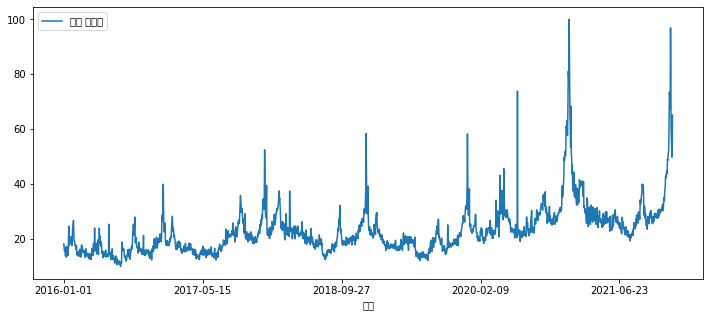

In [32]:
# 그래프 출력
wineDF.plot(kind='line',figsize=(12, 5))    

### 2-3번 분석 결과 
- 와인 검색량이 점점 증가하는 추세 (검색량은 직접 만드는 것 + 구매하는 것 둘 다 포함이라고 생각)
- 와인 트렌드에서 따온 포도 즈려 밟아서 와인 만들기 => 어른과 아이가 동시에 참여 가능 
- 세계적인 축제 '스페인 토마토 축제'와 비슷한 성격을 띔
- 물컹한 질감을 발로 밟는 원시적인 즐거움 + 와인이라는 완성품 생성이 포인트

## ★최종 분석 결과★

- 8.8은 그대로 유지
- 해당 월(8월)에 포도 축제를 검색량이 많은 지역에 신설해 지역주민의 참여를 유도 후 구매로 이어지게 하기
- 최종 목적 : 3.3 day에 다들 삼겹살을 먹으러 가는 것 처럼, 8.8은 포도 사먹는 날로 생각하게 하고 싶다.

## 아쉬운 점
- 구매와 관련되 트렌드 데이터를 찾고 싶었는데, 유료거나 기업 내부 데이터라 확보할 수 없었음. 
